In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading CSV

df = pd.read_csv('/home/karush/code/karushp/practice/euro-data/euro2024-infographics/data/Uefa Euro Cup All Matches.csv')

In [7]:
df.head()

,Date,Time,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year
0,6 July 1960 (1960-07-06),20:00,France,Yugoslavia,4,5,Semi-finals,NaN,Parc des Princes,Paris,26370,1960
1,6 July 1960 (1960-07-06),21:30,Czechoslovakia,Soviet Union,0,3,Semi-finals,NaN,Stade Vélodrome,Marseille,25184,1960
2,9 July 1960 (1960-07-09),21:30,Czechoslovakia,France,2,0,Third place play-off,NaN,Stade Vélodrome,Marseille,9438,1960
3,10 July 1960 (1960-07-10),21:30,Soviet Union,Yugoslavia,2,1,Final,Soviet Union win after extra time,Parc des Princes,Paris,17966,1960
4,17 June 1964 (1964-06-17),20:00,Spain,Hungary,2,1,Semi-finals,Spain win after extra time,Santiago Bernabéu,Madrid,34713,1964


In [12]:
df.iloc[0,6]

'Semi-finals'

In [43]:
# Clearing string for Home and Away team
df['HomeTeamName'] = df['HomeTeamName'].str.strip()
df['AwayTeamName'] = df['AwayTeamName'].str.strip()
df['SpecialWinConditions'] = df['SpecialWinConditions'].str.strip()

In [48]:
# Filling NULL value with NA
df['SpecialWinConditions'].fillna('NA',inplace=True)

In [97]:
# function to show history for 2 teams
def history(team1,team2):

    mask = ((df['HomeTeamName'] == team1) & (df['AwayTeamName'] == team2)) | \
           ((df['HomeTeamName'] == team2) & (df['AwayTeamName'] == team1))


    result = df[mask]

    return result


In [107]:
spain_hungary_matches = history('England','Spain')
spain_hungary_matches

,Date,Time,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year
31,18 June 1980 (1980-06-18),17:45,Spain,England,1,2,Group 2,NA,Stadio San Paolo,Naples,14440,1980
104,22 June 1996 (1996-06-22),15:00,Spain,England,0,0,Quarter-finals,England win on Penalities 2–4,Wembley Stadium,London,75440,1996


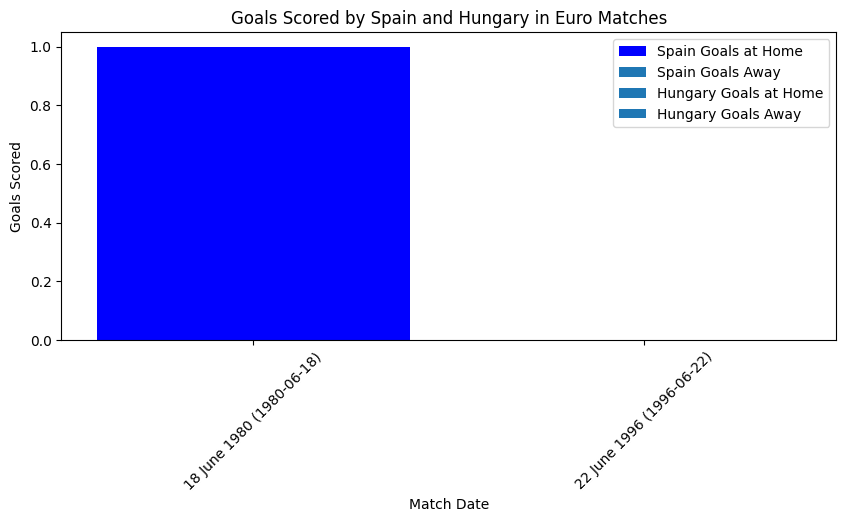

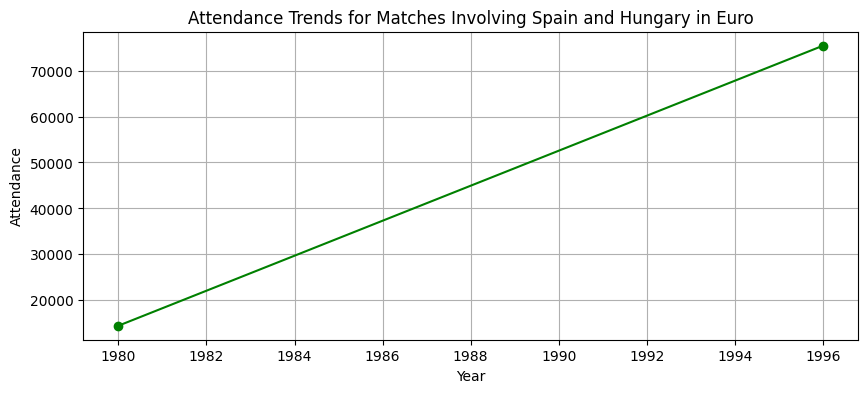

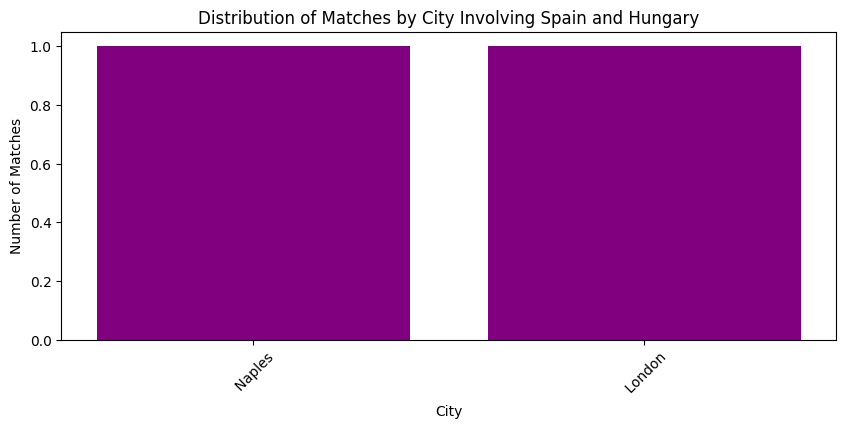

In [108]:
# Plot 1: Goals scored by Spain and Hungary
plt.figure(figsize=(10, 4))

# Goals scored by Spain
spain_matches = spain_hungary_matches[
    (spain_hungary_matches['HomeTeamName'] == 'Spain') | (spain_hungary_matches['AwayTeamName'] == 'Spain')]

# Separate goals
home_spain = spain_matches[spain_matches['HomeTeamName'] == 'Spain']
away_spain = spain_matches[spain_matches['AwayTeamName'] == 'Spain']

plt.bar(home_spain['Date'], home_spain['HomeTeamGoals'], label='Spain Goals at Home', color='blue')
plt.bar(away_spain['Date'], away_spain['AwayTeamGoals'], label='Spain Goals Away', color='lightblue')

# Goals scored by Hungary
hungary_matches = spain_hungary_matches[
    (spain_hungary_matches['HomeTeamName'] == 'Hungary') | (spain_hungary_matches['AwayTeamName'] == 'Hungary')]

# Separate goals
home_hungary = hungary_matches[hungary_matches['HomeTeamName'] == 'Hungary']
away_hungary = hungary_matches[hungary_matches['AwayTeamName'] == 'Hungary']

plt.bar(home_hungary['Date'], home_hungary['HomeTeamGoals'], label='Hungary Goals at Home', color='red')
plt.bar(away_hungary['Date'], away_hungary['AwayTeamGoals'], label='Hungary Goals Away', color='pink')

plt.xlabel('Match Date')
plt.ylabel('Goals Scored')
plt.title('Goals Scored by Spain and Hungary in Euro Matches')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot 2: Attendance over the years for matches involving Spain and Hungary
plt.figure(figsize=(10, 4))
plt.plot(spain_hungary_matches['Year'], spain_hungary_matches['Attendance'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.title('Attendance Trends for Matches Involving Spain and Hungary in Euro')
plt.grid(True)
plt.show()

# Plot 3: Distribution of matches by city
plt.figure(figsize=(10, 4))
cities = spain_hungary_matches['City'].value_counts()
plt.bar(cities.index, cities.values, color='purple')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.title('Distribution of Matches by City Involving Spain and Hungary')
plt.xticks(rotation=45)
plt.show()

In [92]:
df[(df['HomeTeamName']=='Spain')& (df['AwayTeamName']=='England')]


,Date,Time,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year
31,18 June 1980 (1980-06-18),17:45,Spain,England,1,2,Group 2,NA,Stadio San Paolo,Naples,14440,1980
104,22 June 1996 (1996-06-22),15:00,Spain,England,0,0,Quarter-finals,England win on Penalities 2–4,Wembley Stadium,London,75440,1996
